In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [4]:
# Generate the dataset with 2 features to keep it simple 
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2, 
                           n_redundant=0, weights=[0.9, 0.1], random_state=2017) 

print ("Positive class: ", y.tolist().count(1))
print ("Negative class: ", y.tolist().count(0))

Positive class:  514
Negative class:  4486


***Applying the sampling techniques***

In [10]:
# Apply the random under-sampling
rus = RandomUnderSampler(random_state=42)
X_RUS, y_RUS = rus.fit_resample(X, y)

In [11]:
# Apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X, y)

# Apply regular SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

***Plot the original vs re-sampled***

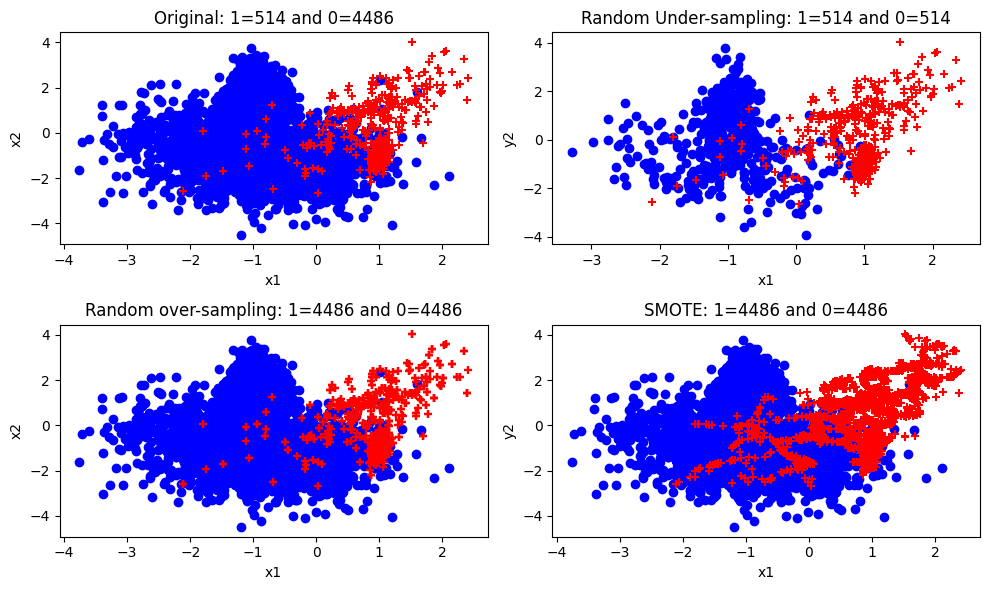

In [12]:
# Original vs resampled subplots
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.scatter(X[y==0,0], X[y==0,1], marker='o', color='blue')
plt.scatter(X[y==1,0], X[y==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original: 1=%s and 0=%s' %(y.tolist().count(1), y.tolist().count(0)))

plt.subplot(2,2,2)
plt.scatter(X_RUS[y_RUS==0,0], X_RUS[y_RUS==0,1], marker='o', color='blue')
plt.scatter(X_RUS[y_RUS==1,0], X_RUS[y_RUS==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('Random Under-sampling: 1=%s and 0=%s' %(y_RUS.tolist().count(1), y_RUS.tolist().count(0)))

plt.subplot(2,2,3)
plt.scatter(X_ROS[y_ROS==0,0], X_ROS[y_ROS==0,1], marker='o', color='blue')
plt.scatter(X_ROS[y_ROS==1,0], X_ROS[y_ROS==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random over-sampling: 1=%s and 0=%s' %(y_ROS.tolist().count(1), y_ROS.tolist().count(0)))

plt.subplot(2,2,4)
plt.scatter(X_SMOTE[y_SMOTE==0,0], X_SMOTE[y_SMOTE==0,1], marker='o', color='blue')
plt.scatter(X_SMOTE[y_SMOTE==1,0], X_SMOTE[y_SMOTE==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('SMOTE: 1=%s and 0=%s' %(y_SMOTE.tolist().count(1), y_SMOTE.tolist().count(0)))

plt.tight_layout()
plt.show()

***Which re-sampling technique is the best?***

In [15]:
from sklearn import tree
from sklearn import metrics

# split data into train and test
from sklearn.model_selection import train_test_split

X_RUS_train, X_RUS_test, y_RUS_train, y_RUS_test = train_test_split(X_RUS, y_RUS, test_size=0.3, random_state=2017)
X_ROS_train, X_ROS_test, y_ROS_train, y_ROS_test = train_test_split(X_ROS, y_ROS, test_size=0.3, random_state=2017)
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3, random_state=2017)

# build a decision tree classifier
clf = tree.DecisionTreeClassifier(random_state=2017)
clf_rus = clf.fit(X_RUS_train, y_RUS_train)
clf_ros = clf.fit(X_ROS_train, y_ROS_train)
clf_smote = clf.fit(X_SMOTE_train, y_SMOTE_train)

# evaluate model performance
print ("\nRUS - Train AUC : ",metrics.roc_auc_score(y_RUS_train, clf.predict(X_RUS_train)))
print ("RUS - Test AUC : ",metrics.roc_auc_score(y_RUS_test, clf.predict(X_RUS_test)))
print ("ROS - Train AUC : ",metrics.roc_auc_score(y_ROS_train, clf.predict(X_ROS_train)))
print ("ROS - Test AUC : ",metrics.roc_auc_score(y_ROS_test, clf.predict(X_ROS_test)))
print ("\nSMOTE - Train AUC : ",metrics.roc_auc_score(y_SMOTE_train, clf.predict(X_SMOTE_train)))
print ("SMOTE - Test AUC : ",metrics.roc_auc_score(y_SMOTE_test, clf.predict(X_SMOTE_test)))


RUS - Train AUC :  0.9845659412994656
RUS - Test AUC :  0.9839646464646465
ROS - Train AUC :  0.9896331738437001
ROS - Test AUC :  0.9598253786103702

SMOTE - Train AUC :  1.0
SMOTE - Test AUC :  0.9453916258346484
